In [2]:
# Carregar os dados

import pandas as pd 

df = pd.read_csv('./Telco_Customer_Churn_Colunas_Alteradas.csv')
df.info()

for col in df.columns:
    print(f'{col}: {df[col].unique()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            1000 non-null   object 
 1   genero                1000 non-null   object 
 2   idoso                 1000 non-null   int64  
 3   conjuge               1000 non-null   object 
 4   dependentes           1000 non-null   object 
 5   tempo_permanecido     1000 non-null   int64  
 6   servico_telefone      1000 non-null   object 
 7   multiplas_linhas      1000 non-null   object 
 8   servico_internet      1000 non-null   object 
 9   seguranca_online      1000 non-null   object 
 10  backup_online         1000 non-null   object 
 11  protecao_dispositivo  1000 non-null   object 
 12  suporte_ti            1000 non-null   object 
 13  streaming_tv          1000 non-null   object 
 14  streaming_movies      1000 non-null   object 
 15  tempo_contratual      

In [3]:
# Cerificar valores únicos em cada coluna

for col in df.columns:
    print(f"{col}: {df[col].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-POOKP' '6388-TABGU'
 '9763-GRSKD' '7469-LKBCI' '8091-TTVAX' '0280-XJGEX' '5129-JLPIS'
 '3655-SNQYZ' '8191-XWSZG' '9959-WOFKT' '4190-MFLUW' '4183-MYFRB'
 '8779-QRDMV' '1680-VDCWW' '1066-JKSGK' '3638-WEABW' '6322-HRPFA'
 '6865-JZNKO' '6467-CHFZW' '8665-UTDHZ' '5248-YGIJN' '8773-HHUOZ'
 '3841-NFECX' '4929-XIHVW' '6827-IEAUQ' '7310-EGVHZ' '3413-BMNZE'
 '6234-RAAPL' '6047-YHPVI' '6572-ADKRS' '5380-WJKOV' '8168-UQWWF'
 '8865-TNMNX' '9489-DEDVP' '9867-JCZSP' '4671-VJLCL' '4080-IIARD'
 '3714-NTNFO' '5948-UJZLF' '7760-OYPDY' '7639-LIAYI' '2954-PIBKO'
 '8012-SOUDQ' '9420-LOJKX' '6575-SUVOI' '7495-OOKFY' '4667-QONEA'
 '1658-BYGOY' '8769-KKTPH' '5067-XJQFU' '3957-SQXML' '5954-BDFSG'
 '0434-CSFON' '1215-FIGMP' '0526-SXDJP' '0557-ASKVU' '5698-BQJOH'
 '5122-CYFXA' '8627-ZYGSZ' '3410-YOQBQ' '3170-NMYVV' '7410-OIEDU'
 '2273-QCKXA' '0731-EBJQB' '1891-QRQSA' '8028-PNXHQ' '5630-AHZIL

C:\Users\Kalleu\AppData\Local\Temp\ipykernel_5012\839974311.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['churn'], palette='hls')


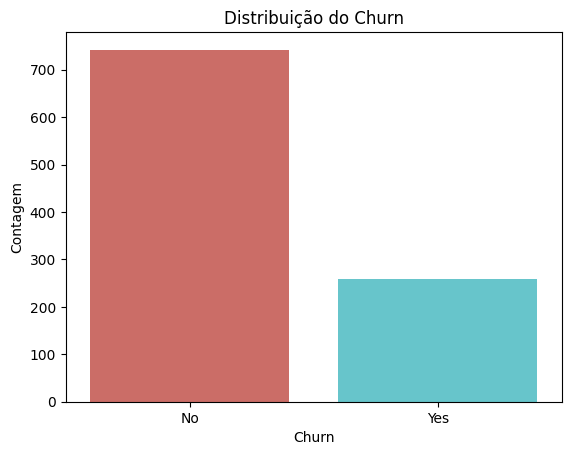

In [4]:
#Ver a distribuição de churn
import seaborn as sns
import matplotlib.pyplot as plt

plt.Figure(figsize=(6, 4))
ax = sns.countplot(x=df['churn'], palette='hls')
plt.title('Distribuição do Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem')

plt.show()

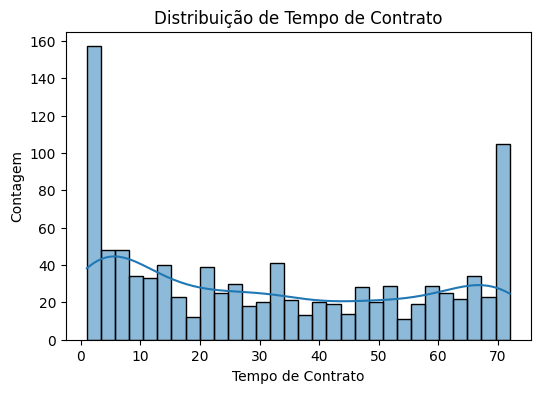

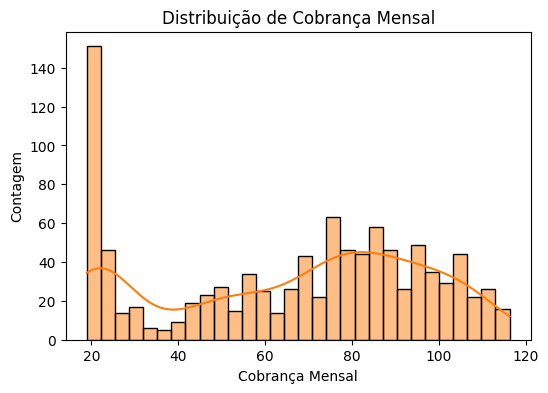

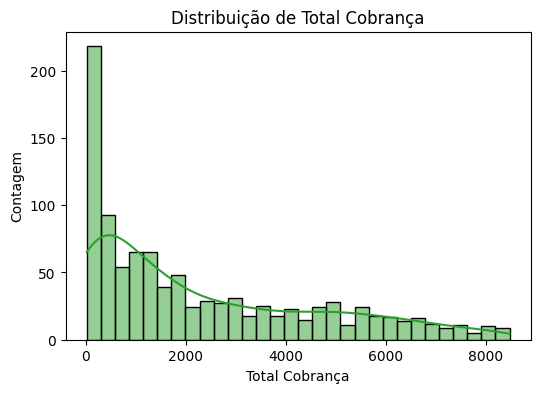

In [5]:
# Verificar a cobrança mensal dos clientes

df = df.rename(columns={
    'tempo_permanecido': 'Tempo de Contrato', 
    'cobranca_mensal': 'Cobrança Mensal', 
    'total_cobranca':'Total Cobrança'})

num_cols = ['Tempo de Contrato', 'Cobrança Mensal', 'Total Cobrança']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for col, color in zip(num_cols, colors):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color=color)
    plt.title(f'Distribuição de {col}')
    plt.ylabel('Contagem')
    plt.show()

C:\Users\Kalleu\AppData\Local\Temp\ipykernel_5012\2478694458.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='Tempo de Contrato', data=df, palette='hls')


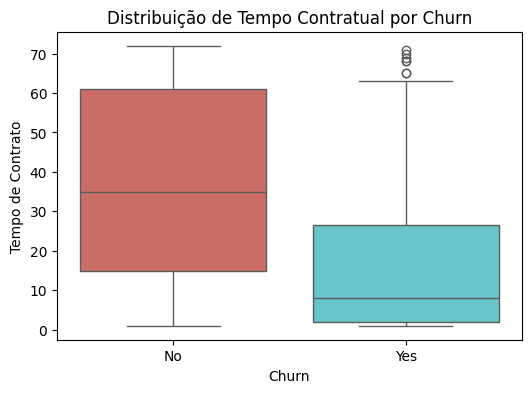

In [6]:
#Tempo de permanencia dos clientes

plt.figure(figsize=(6, 4))
sns.boxplot(x='churn', y='Tempo de Contrato', data=df, palette='hls')
plt.title('Distribuição de Tempo Contratual por Churn')
plt.xlabel('Churn')
plt.show()

C:\Users\Kalleu\AppData\Local\Temp\ipykernel_5012\254044870.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Faixa de Tempo de Contrato'], palette='Spectral_r', order=labels)


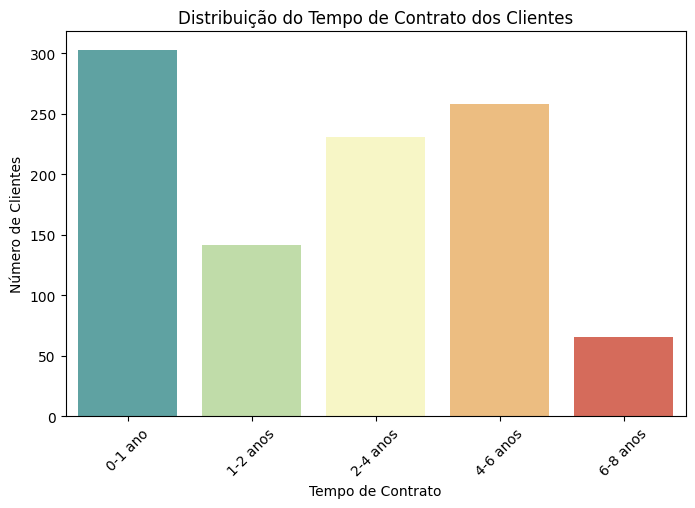

In [7]:
# Verificar o tempo de contrato das empresas

bins = [0, 12, 24, 48, 72, 96]
labels = ['0-1 ano', '1-2 anos', '2-4 anos', '4-6 anos', '6-8 anos']

df['Faixa de Tempo de Contrato'] = pd.cut(df['Tempo de Contrato'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Faixa de Tempo de Contrato'], palette='Spectral_r', order=labels)
plt.title('Distribuição do Tempo de Contrato dos Clientes')
plt.xlabel('Tempo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

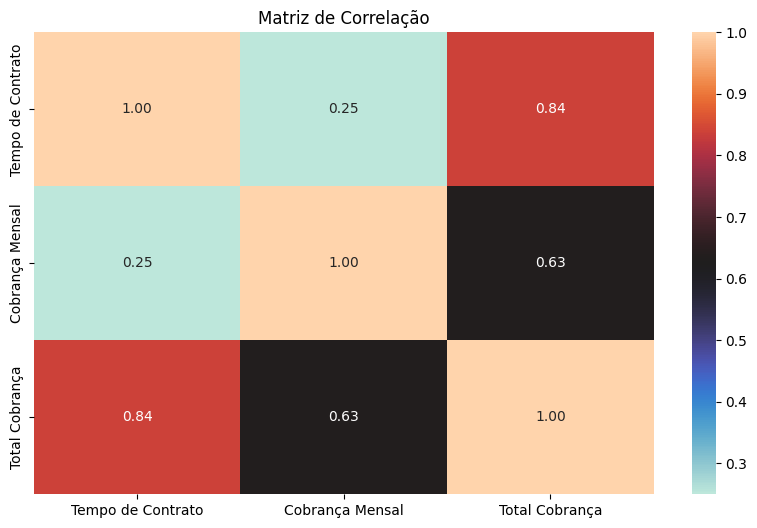

In [8]:
# Matriz de correlação do tempo de contrato, cobrança Mensagem e o total de cobrança

num_cols = ['Tempo de Contrato', 'Cobrança Mensal', 'Total Cobrança']

plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="icefire", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [9]:
# Modelo Preditivo de Churn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

df = pd.read_csv('./Telco_Customer_Churn_Colunas_Alteradas.csv')

cat_cols = df.select_dtypes(include=['object']).columns.tolist()

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

X = df.drop(columns=['churn_Yes'])
y = df['churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.93      0.90       149
        True       0.75      0.59      0.66        51

    accuracy                           0.84       200
   macro avg       0.81      0.76      0.78       200
weighted avg       0.84      0.84      0.84       200



C:\Users\Kalleu\AppData\Local\Temp\ipykernel_5012\3113174426.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='coolwarm')


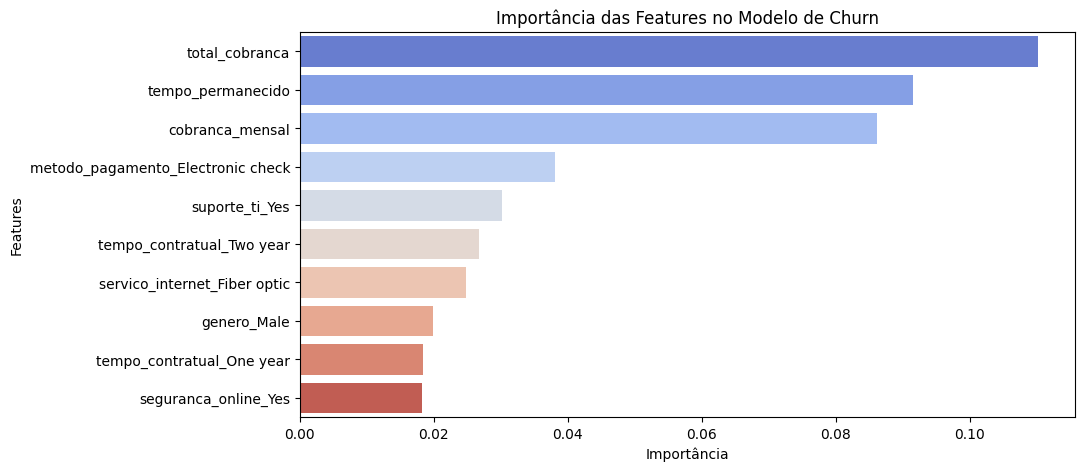

In [12]:
# Variáveis mais impactantes TOP 10

top_n = 10
importances = importances[:top_n]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=importances.index, palette='coolwarm')
plt.title('Importância das Features no Modelo de Churn')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.show()

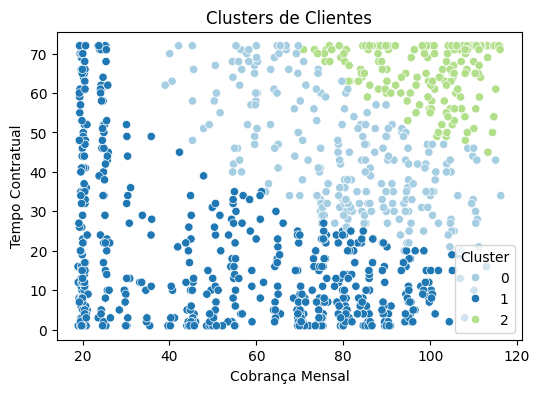

In [16]:
# Perfis propensos a sair

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['cobranca_mensal'], y=df['tempo_permanecido'], hue=df['Cluster'], palette='Paired')
plt.title('Clusters de Clientes')
plt.xlabel('Cobrança Mensal')
plt.ylabel('Tempo Contratual')
plt.show()